# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Fauzan Fadhillah Arisandi
- Email: fauzanarisandiwoodward90@gmail.com
- Id Dicoding: fauzanfa21

## Persiapan

### Menyiapkan library yang dibutuhkan

kita import library yang akan digunakan untuk projek ini

In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
import joblib


### Menyiapkan data yang akan digunakan

import employee_data.csv ke colab atau simpan dalam folder projek yang akan kita gunaka

In [2]:
df = pd.read_csv("data.csv")
df.head()


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Dataset berisi data performa akademik, demografi, dan kondisi finansial mahasiswa.
Setiap baris merepresentasikan satu mahasiswa.

Jumlah observasi dan fitur akan diperiksa untuk memastikan kesiapan data
sebelum masuk ke tahap analisis dan modeling.

## Data Understanding

### Struktur Data

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

ini adalah pemeriksaan jumlah baris, kolom,
serta tipe data masing-masing variabel.

### Distribusi Target

Analisis selanjutnya bertujuan untuk melihat proporsi mahasiswa dropout
dibandingkan mahasiswa yang masih aktif atau telah lulus.

In [4]:
df['Status'].value_counts()


Graduate    2209
Dropout     1421
Enrolled     794
Name: Status, dtype: int64

ini adalah jumlah mahawasiswa berdasarkan kriteria graduate , dropout dan enrolled (dalam bentuk angka)

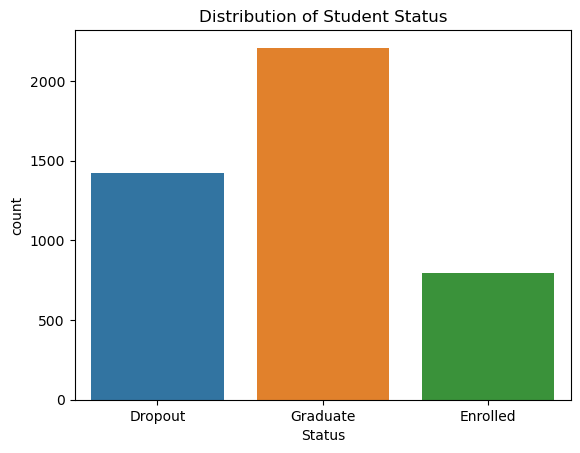

In [5]:
sns.countplot(data=df, x='Status')
plt.title("Distribution of Student Status")
plt.show()


ini adalah jumlah mahawasiswa berdasarkan kriteria graduate , dropout dan enrolled (dalam bentuk grafik)

### EDA Univariate

EDA univariate dilakukan untuk memahami distribusi masing-masing fitur
secara independen.

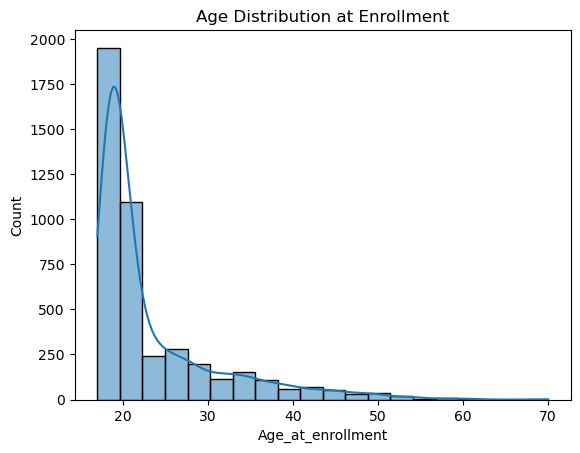

In [6]:
sns.histplot(df['Age_at_enrollment'], bins=20, kde=True)
plt.title("Age Distribution at Enrollment")
plt.show()


grafik ini menggambarkan total jumlah enrollment sesuai dengan umur mahasiswa.

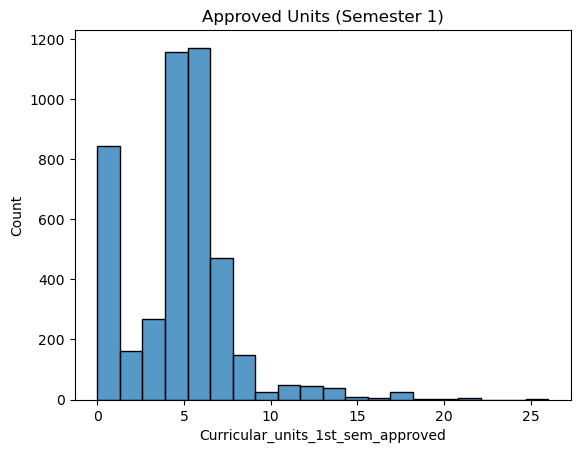

In [7]:
sns.histplot(df['Curricular_units_1st_sem_approved'], bins=20)
plt.title("Approved Units (Semester 1)")
plt.show()


grafik ini menggambarkan jumlah mahasiswa mahasiswa yang statusnya telah disetujui atau diterima secara resmi.

### EDA Bivariate

Analisis bivariate digunakan untuk melihat hubungan antara
fitur akademik dan status dropout.

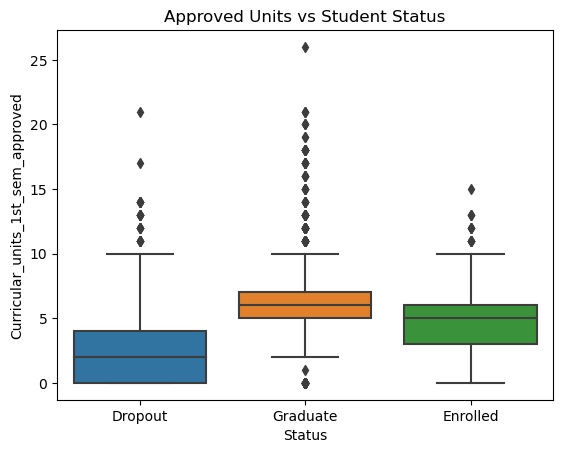

In [8]:
sns.boxplot(data=df, x='Status', y='Curricular_units_1st_sem_approved')
plt.title("Approved Units vs Student Status")
plt.show()


grafik ini menunjukkan perbandingan jumlah curricular units yang disetujui pada semester pertama berdasarkan status mahasiswa (Dropout, Graduate, dan Enrolled).

## Data Preparation / Preprocessing

### Target Encoding

Status mahasiswa dikonversi menjadi variabel biner
untuk keperluan supervised learning.

In [9]:
df['target'] = df['Status'].apply(lambda x: 1 if x == 'Dropout' else 0)


### Feature Selection

Fitur dipilih berdasarkan relevansi bisnis dan kemampuan
untuk mendeteksi risiko dropout sejak awal.

In [10]:
features = [
    'Age_at_enrollment',
    'Admission_grade',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Scholarship_holder',
    'Tuition_fees_up_to_date'
]

X = df[features]
y = df['target']


X adalah fitur-fitur yang digunakan nanti untuk inputan prediksi dan target/status menjadi hasil outputnya


### Train-Test Split

Data dibagi menjadi data latih dan data uji
untuk mengevaluasi performa model secara objektif.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


kita set train data 80% dan test data 20%


### Feature Scaling

Standarisasi dilakukan untuk model yang sensitif
terhadap skala fitur

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## MODELING

kita akan menggunakan logistic regression sebagai model

### Logistic Regression

In [13]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)


Kode ini membuat dan melatih model **Logistic Regression** untuk tugas klasifikasi. `LogisticRegression(max_iter=1000)` digunakan untuk memastikan proses optimisasi konvergen dengan baik. Model kemudian dilatih menggunakan data latih yang sudah distandardisasi (`X_train_scaled`) dan label target (`y_train`). Setelah pelatihan selesai, `predict()` digunakan untuk menghasilkan prediksi kelas pada data uji (`X_test_scaled`), yang hasilnya disimpan dalam `y_pred_lr`.


In [14]:
joblib.dump(lr, "model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

Kode ini digunakan untuk **menyimpan (serialize) model dan scaler** ke dalam file agar dapat digunakan kembali tanpa perlu melatih ulang. `joblib.dump(lr, "model.pkl")` menyimpan model Logistic Regression yang telah dilatih, sedangkan `joblib.dump(scaler, "scaler.pkl")` menyimpan objek scaler yang digunakan untuk normalisasi data. File ini dapat dimuat kembali saat proses deployment atau inferensi.


## EVALUATION


Evaluasi dilakukan untuk mengukur performa model
dalam mendeteksi mahasiswa dropout.

Recall menjadi metrik utama karena tujuan proyek
adalah early detection.

In [15]:
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))


Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       601
           1       0.84      0.64      0.73       284

    accuracy                           0.85       885
   macro avg       0.84      0.79      0.81       885
weighted avg       0.85      0.85      0.84       885



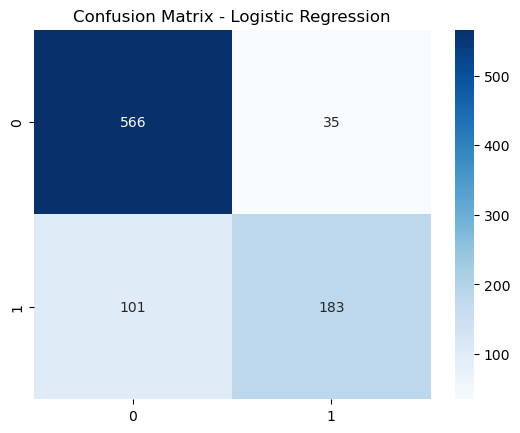

In [16]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
